<a href="https://colab.research.google.com/github/Fercaspe/Data-UY/blob/main/11_MCD_UCU_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales con Python

# Introducción

El ámbito de las redes neuronales y su hermano mayor, el deep learning, es complejo y amplio. Durante los últimos años, el interés y la aplicación de este tipo de modelos han experimentado tal expansión que se ha convertido en una disciplina por sí misma. Si bien entender bien sus fundamentos requiere de una cantidad notable de tiempo y práctica, esto no significa que se necesiten adquirir todos ellos para empezar a sacarles partido; del mismo modo que no es necesario conocer el funcionamiento de todos los componentes de un smart phone (procesador, antena, circuitos...) para utilizarlo de forma productiva (hacer fotos, mandar email, navegar por internet...). En este documento se presenta una introducción, más intuitiva que rigurosa, sobre los modelos de redes neuronales y de cómo crearlos con python.

En el ecosistema de python, existen múltiples librerías que permiten crear modelos basados en redes neuronales. Conviene diferenciar entre dos casos de uso ya que, dependiendo de estos, son más adecuadas unas librerías u otras:

- Modelos de redes simples (multi-perceptrón): estos modelos se caracterizan por tener arquitecturas relativamente sencillas por lo que los requerimientos computacionales no son elevados y no es necesario el uso el uso de GPUs. Dentro de este grupo destacan las implementaciones de Scikit-learn y H2O)

- Deep learning: son modelos más complejos (redes convolucionales, redes recurrentes, LSTM...) cuyos requerimientos computacionales hacen necesario el uso de GPUs. Para este tipo de modelos se tiene que recurrir a frameworks especializados para como Tensorflow-Keras o Pytorch.

Los ejemplos de este documento se corresponden con el primer caso de uso, por lo que se utiliza la librería Scikit-learn para crear los modelos.


# Redes neuronales


## Estructura de la red


Las redes neuronales son modelos creados al ordenar operaciones matemáticas siguiendo una determinada estructura. La forma más común de representar la estructura de una red neuronal es mediante el uso de capas (layers), formadas a su vez por neuronas (unidades, units o neurons). Cada neurona, realiza una operación sencilla y está conectada a las neuronas de la capa anterior y de la capa siguiente mediante pesos, cuya función es regular la información que se propaga de una neurona a otra.

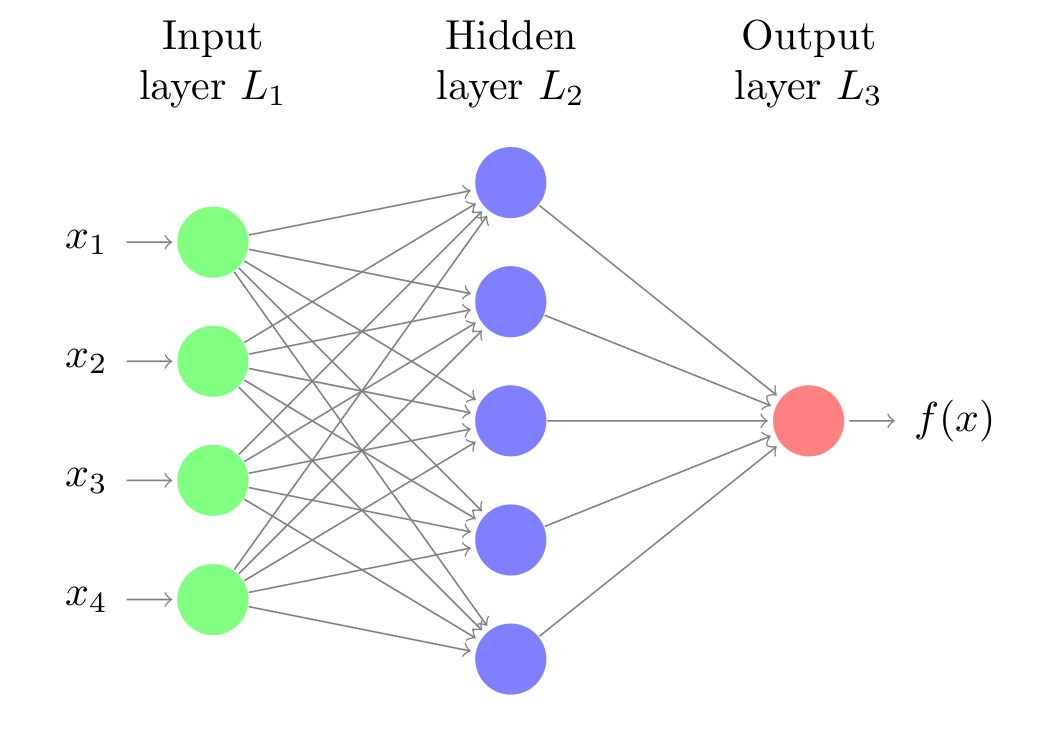
Representación de una red neuronal feed-forward (single-layer perceptron). Fuente: Computer Age Statistical Inference 2016


La primera capa de la red neuronal (color verde) se conoce como capa de entrada o input layer y recibe los datos en bruto, es decir, el valor de los predictores. La capa intermedia (color azul), conocida como capa oculta o hidden layer, recibe los valores la capa de entrada, ponderados por los pesos (flechas grises). La última capa, llamada output layer, combina los valores que salen de la capa intermedia para generar la predicción.

Para facilitar la comprensión de la estructura de las redes, es útil representar una red equivalente a un modelo de regresión lineal.

$$y=w_1x_1+...+w_dx_d+b$$

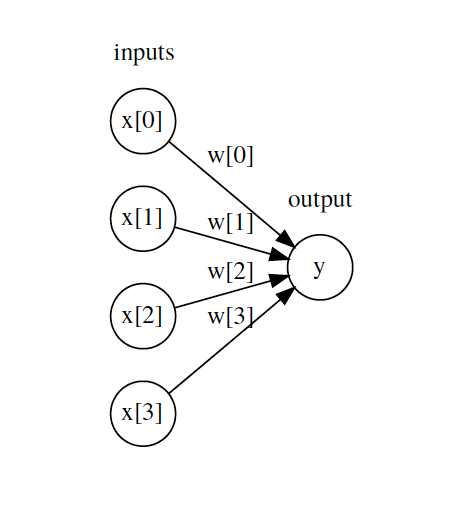

Representación de una red neuronal equivalente a un modelo lineal con 4 predictores. Fuente: COMS W4995 Applied Machine Learning

Cada neurona de la capa de entrada representa el valor de uno de los predictores. Las flechas representan los coeficientes de regresión, que en términos de redes se llaman pesos, y la neurona de salida representa el valor predicho. Para que esta representación equivalga a la ecuación de un modelo lineal, faltan dos cosas:

- El bias del modelo.

- Las operaciones de multiplicación y suma que combinan el valor de los predictores con los pesos del modelo.

La capa intermedia de una red tiene un valor de bias, pero suele omitirse en las representaciones gráficas. En cuanto a las operaciones matemáticas, es el elemento clave que ocurre dentro de las neuronas y conviene verlo con detalle.


## La neurona (unidad)


La neurona es la unidad funcional de los modelos de redes. Dentro de cada neurona, ocurren simplemente dos operaciones: la suma ponderada de sus entradas y la aplicación de una función de activación.

En la primera parte, se multiplica cada valor de entrada  xi  por su peso asociado  wi  y se suman junto con el bías. Este es el valor neto de entrada a la neurona. A continuación, este valor se pasa por una función, conocida como función de activación, que transforma el valor neto de entrada en un valor de salida.

Si bien el valor que llega a la neurona, multiplicación de los pesos por las entradas, siempre es una combinación lineal, gracias a la función de activación, se pueden generar salidas muy diversas. Es en la función de activación donde reside el potencial de los modelos de redes para aprender relaciones no lineales.

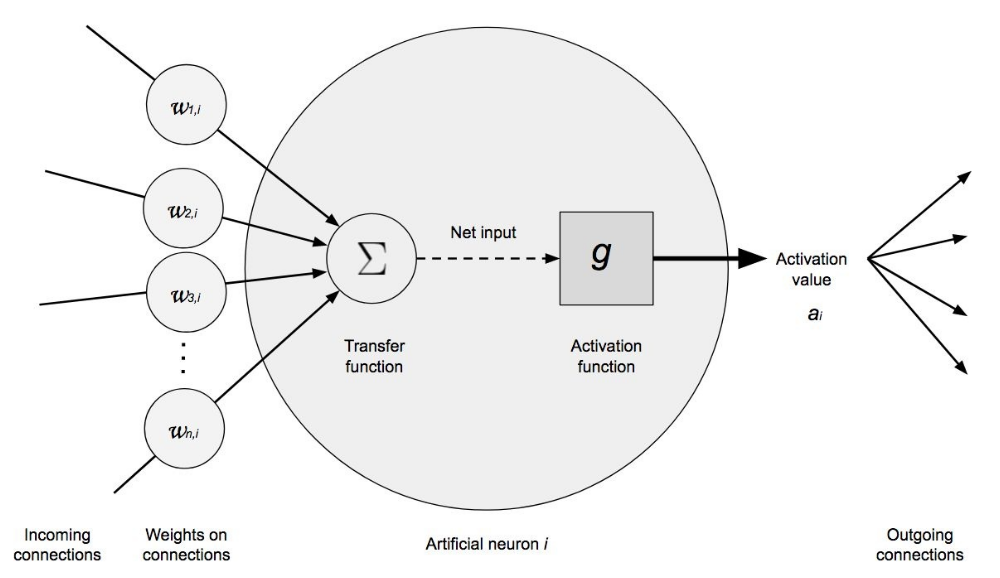

Representación de una neurona. Fuente: Deep Learning A Practitioner’s Approach by Josh Patterson and Adam Gibson

La anterior ha sido una explicación intuitiva del funcionamiento de una neurona. Véase ahora una definición más matemática.

El valor neto de entrada a una neurona es la suma de los valores que le llegan, ponderados por el peso de las conexiones, más el bias.

$$entrada=∑_{i=1}^nx_iw_i+b$$

En lugar de utilizar la sumatoria, esta operación suele representarse como el producto matricial, donde $X$  representa el vector de los valores de entrada y  $W$  el vector de pesos.

$$entrada=XW+b$$

A este valor se le aplica una función de activación ($g$) que lo transforma en lo que se conoce como valor de activación ($a$), que es lo que finalmente sale de la neurona.

$$a=g(entrada)=g(XW+b)$$

Para la capa de entrada, donde únicamente se quiere incorporar el valor de los predictores, la función de activación es la unidad, es decir, sale lo mismo que entra. En la capa de salida, la función de activación utilizada suele ser la identidad para problemas de regresión y soft max para clasificación.


##Función de activación


Las funciones de activación controlan en gran medida que información se propaga desde una capa a la siguiente (forward propagation). Estas funciones convierten el valor neto de entrada a la neuronal, combinación de los input, pesos y bías, en un nuevo valor. Es gracias a la combinación de funciones de activación no lineales con múltiples capas (ver más adelante), que los modelos de redes son capaces de aprender relaciones no lineales.

La gran mayoría de funciones de activación convierten el valor de entrada neto de la neurona en un valor dentro del rango (0, 1) o (-1, 1). Cuando el valor de activación de una neurona (salida de su función de activación) es cero, se dice que la neurona está inactiva, ya que no pasa ningún tipo de información a las siguientes neuronas. A continuación, se describen las funciones de activación más empleadas.


###Rectified linear unit (ReLU)

La función de activación ReLu aplica una transformación no lineal muy simple, activa la neurona solo si el input está por encima de cero. Mientras el valor de entrada está por debajo de cero, el valor de salida es cero, pero cuando es superior de cero, el valor de salida aumenta de forma lineal con el de entrada.

$$ReLU(x)=max(x,0)$$

De esta forma, la función de activación retiene únicamente los valores positivos y descarta los negativos dándoles una activación de cero.

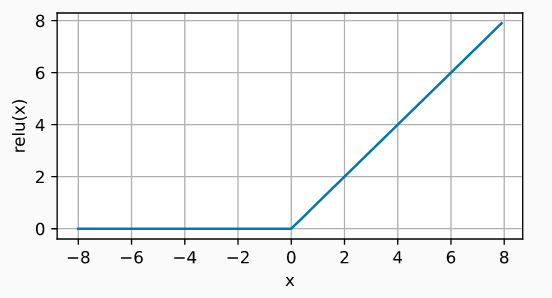
Representación función activación ReLU.

ReLU es con diferencia la función de activación más empleada, por sus buenos resultados en aplicaciones diversas. La razón de esto reside en el comportamiento de su derivada (gradiente), que es cero o constante, evitando así un problema conocido como vanishing gradients que limita la capacidad de aprendizaje de los modelos de redes.

###Sigmoide

La función sigmoide transforma valores en el rango de (-inf, +inf) a valores en el rango (0, 1).

$$sigmoid(x)=\frac{1}{1+exp(−x)}$$

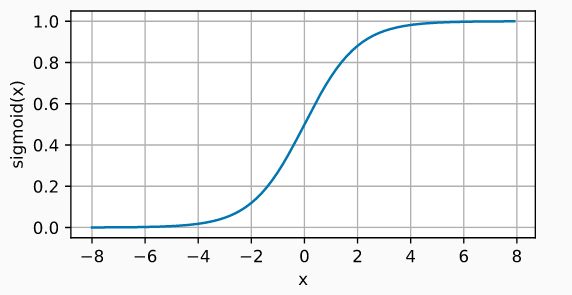
Representación función activación sigmoide.

Aunque la función de activación sigmoide se utilizó mucho en los inicios de los modelos de redes, en la actualidad, suele preferirse la función ReLU.

Un caso en el que la función de activación sigmoide sigue siendo la función utilizada por defecto es en las neuronas de la capa de salida de los modelos de clasificación binaria, ya que su salida puede interpretarse como probabilidades.


###Tangente hiperbólica (Tanh)

La función de activación Tanh, se comporta de forma similar a la función sigmoide, pero su salida está acotada en el rango (-1, 1).

$$tanh(x)=\frac{1−exp(−2x)}{1+exp(−2x)}$$

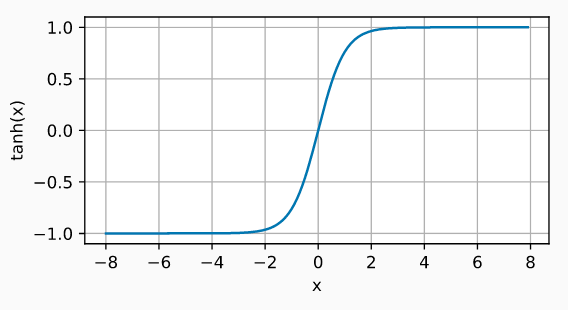

Sin las funciones de activación, las redes neuronales solo pueden aprender relaciones lineales.

##Función de coste (loss function)


La función de coste ($l$), también llamada función de pérdida, loss function o cost function, es la encargada de cuantificar la distancia entre el valor real y el valor predicho por la red, en otras palabras, mide cuánto se equivoca la red al realizar predicciones. En la mayoría de casos, la función de coste devuelve valores positivos. Cuanto más próximo a cero es el valor de coste, mejor son las predicciones de la red (menor error), siendo cero cuando las predicciones se corresponden exactamente con el valor real.

La función de coste puede calcularse para una única observación o para un conjunto de datos (normalmente promediando el valor de todas las observaciones). El segundo caso, es el que se utiliza para dirigir el entrenamiento de los modelos.

Dependiendo del tipo de problema, regresión o clasificación, es necesario utilizar una función de coste u otra. En problemas de regresión, las más utilizadas son el error cuadrático medio y el error absoluto medio. En problemas de clasificación suele emplearse la función log loss, también llamada logistic loss o cross-entropy loss.

###Error cuadrático medio

El error cuadrático medio (mean squared error, MSE) es con diferencia la función de coste más utilizada en problemas de regresión. Para una determinada observación $i$, el error cuadrático se calcula como la diferencia al cuadrado entre el valor predicho ($\hat{y}$) y el valor real $y$.

$$l(i)(w,b)=(\hat{y}^{(i)}−y^{(i)})^2$$

Las funciones de coste suelen escribirse con la notación $l(w,b)$ para hacer referencia a que su valor depende de los pesos y bias del modelo, ya que son estos los que determinan el valor de las predicciones y^{(i)}.

Con frecuencia, esta función de coste se encuentra multiplicada por $1/2$, esto es simplemente por conveniencia matemática para simplificar el cálculo de su derivada.

$$l(i)(w,b)=\frac{1}{2}(\hat{y}^{(i)}−y^{(i)})^2$$

Para cuantificar el error que comete el modelo en todo un conjunto de datos, por ejemplo los de entrenamiento, simplemente se promedia el error de todas las $N$ observaciones.

$$
L(w,b)=\frac{1}{n}∑_{i=1}^nl^{(i)}(w,b)=\frac{1}{n}∑_{i=1}^n(\hat{y}^{(i)}−y^{(i)})^2
$$
Cuando un modelo se entrena utilizando el error cuadrático medio como función de coste, está aprendiendo a predecir la media de la variable respuesta.


###Error medio absoluto

El error medio absoluto (mean absolute error, MAE) consiste en promediar el error absoluto de las predicciones.

$$L(w,b)=\frac{1}{n}∑_{i=1}^n|\hat{y}^(i)−y^(i)|$$

El error medio absoluto es más robusto frente a outliers que el error cuadrático medio. Esto significa que el entrenamiento del modelo se ve menos influenciado por datos anómalos que pueda haber en el conjunto de entrenamiento. Cuando un modelo se entrena utilizando el error absoluto medio como función de coste, está aprendiendo a predecir la mediana de la variable respuesta.


###Log loss, logistic loss o cross-entropy loss

En problemas de clasificación, la capa de salida utiliza como función de activación la función softmax. Gracias a esta función, la red devuelve una serie de valores que pueden interpretarse como la probabilidad de que la observación predicha pertenezca a cada una de las posibles clases.

Cuando la clasificación es de tipo binaria, donde la variable respuesta es 1 o 0, y $$p=Pr(y=1)$$, la función de coste log-likelihood se define como:

$$
L_{log}(y,p)=−logPr(y|p)=−(ylog(p)+(1−y)log(1−p))
$$

Para problemas de clasificación con más de dos clases, esta fórmula se generaliza a:

$$L_{log}(Y,P)=−logPr(Y|P)=−\frac{1}{N}∑_{i=0}^{N−1}∑_{k=0}^{K−1}y_{i,k}logp{i,k}
$$

En ambos casos, minimizar esta la función equivale a que la probabilidad predicha para la clase correcta tienda a 1, y a 0 en las demás clases.

Dado que esta función se ha utilizado en campos diversos, se le conoce por nombres distintos: Log loss, logistic loss o cross-entropy loss, pero todos hacen referencia a lo mismo.

###Múltiples capas

El modelo de red neuronal con una única capa (single-layer perceptron), aunque supuso un gran avance en el campo del machine learning, solo es capaz de aprender patrones sencillos. Para superar esta limitación, los investigadores descubrieron que, combinando múltiples capas ocultas, la red puede aprender relaciones mucho más complejas entre los predictores y la variable respuesta. A esta estructura se le conoce como perceptrón multicapa o multilayer perceptron (MLP), y puede considerarse como el primer modelo de deep learning.

La estructura de un perceptón multicapa consta de varias capas de neuronas ocultas. Cada neurona está conectada a todas las neuronas de la capa anterior y a las de la capa posterior. Aunque no es estrictamente necesario, todas las neuronas que forman parte de una misma capa suelen emplear la misma función de activación.

Combinando múltiples capas ocultas y funciones de activación no lineales, los modelos de redes pueden aprender prácticamente cualquier patrón. De hecho, está demostrado que, con suficientes neuronas, un MLP es un aproximador universal para cualquier función.

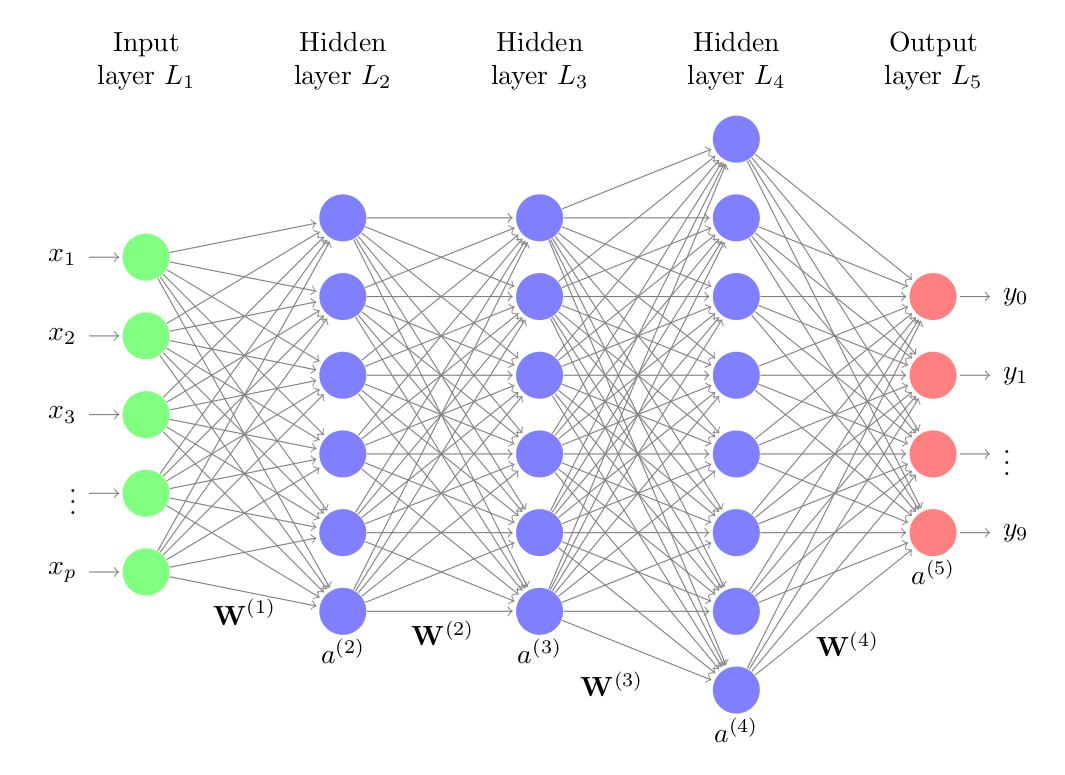
Representación de una red neuronal feed-forward (multi-layer perceptron). Fuente: Computer Age Statistical Inference 2016

# Entrenamiento

El proceso de entrenamiento de una red neuronal consiste en ajustar el valor de los pesos y bías de tal forma que, las predicciones que se generen, tengan el menor error posible. Gracias a esto, el modelo es capaz de identificar qué predictores tienen mayor influencia y de qué forma están relacionados entre ellos y con la variable respuesta.

La idea intuitiva de cómo entrenar una red neuronal es la siguiente:

- Iniciar la red con valores aleatorios de los pesos y bias.

- Para cada observación de entrenamiento ($X, y$ ), calcular el error que comete la red al hacer sus predicciones. Promediar los errores de todas las observaciones.

- Identificar la responsabilidad que ha tenido cada peso y bias en el error de la predicción.

- Modificar ligeramente los pesos y bias de la red (de forma proporcional a su responsabilidad en el error) en la dirección correcta para que se reduzca el error.

- Repetir los pasos 2, 3, 4 y 5 hasta que la red sea suficientemente buena.

Si bien la idea parece sencilla, alcanzar una forma de implementarla ha requerido la combinación de múltiples métodos matemáticos, en concreto, el algoritmo de retropropagación (backpropagation) y la optimización por descenso de gradiente (gradient descent).



##Backpropagation


Backpropagation es el algoritmo que permite cuantificar la influencia que tiene cada peso y bias de la red en sus predicciones. Para conseguirlo, hace uso de la regla de la cadena (chain rule) para calcular el gradiente, que no es más que el vector formado por las derivadas parciales de una función.

En el caso de las redes, la derivada parcial del error respecto a un parámetro (peso o bias) mide cuanta "responsabilidad" ha tenido ese parámetro en el error cometido. Gracias a esto, se puede identificar qué pesos de la red hay que modificar para mejorarla. El siguiente paso necesario, es determinar cuánto y cómo modificarlos (optimización).

##Descenso de gradiente

Descenso de gradiente (gradient descent) es un algoritmo de optimización que permite minimizar una función haciendo actualizaciones de sus parámetros en la dirección del valor negativo de su gradiente. Aplicado a las redes neuronales, el descenso de gradiente permite ir actualizando los pesos y bías del modelo para reducir su error.

Dado que, calcular el error del modelo para todas las observaciones de entrenamiento, en cada iteración, puede ser computacionalmente muy costoso, existe una alternativa al método de descenso de gradiente llamada gradiente estocástico (stochastic gradient descent, SGD). Este método consiste en dividir el conjunto de entrenamiento en lotes (minibatch o batch) y actualizar los parámetros de la red con cada uno. De esta forma, en lugar de esperar a evaluar todas las observaciones para actualizar los parámetros, se pueden ir actualizando de forma progresiva. Una ronda completa de iteraciones sobre todos los batch se llama época. El número de épocas con las que se entrena una red equivale al número de veces que la red ve cada ejemplo de entrenamiento.


##Preprocesado


A la hora de entrenar modelos basados en redes neuronales, es necesario realizar, al menos, dos tipos de transformaciones de los datos.

###Binarización (One hot ecoding) de las variables categóricas

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.


###Estandarización y escalado de variables numéricas

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta. Existen principalmente 2 estrategias para evitarlo:

- Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen.

- Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.

- Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

- Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

Nunca se deben estandarizar las variables después de ser binarizadas (ver a continuación).


#Hiperparámetros


La gran "flexibilidad" que tienen las redes neuronales es un arma de doble filo. Por un lado, son capaces de generar modelos que aprenden relaciones muy complejas, sin embargo, sufren fácilmente el problema de sobreajuste (overfitting) lo que los incapacita al tratar de predecir nuevas observaciones. La forma de minimizar este problema y conseguir modelos útiles, pasa por configurar de forma adecuada sus hiperparámetros. Algunos de los más importantes son:

##Número y tamaño de capas


La arquitectura de una red, el número de capas y el número de neuronas que forman parte de cada capa, determinan en gran medida la complejidad del modelo y con ello su potencial capacidad de aprendizaje.

La capa de entrada y salida son sencillas de establecer. La capa de entrada tiene tantas neuronas como predictores y la capa de salida tiene una neurona en problemas de regresión y tantas como clases en problemas de clasificación. En la mayoría de implementaciones, estos valores se establecen automáticamente en función del conjunto de entrenamiento. El usuario suele especificar únicamente el número de capas intermedias (ocultas) y el tamaño de las mismas.

Cuantas más neuronas y capas, mayor la complejidad de las relaciones que puede aprender el modelo. Sin embargo, dado que en cada neurona está conectada por pesos al resto de neuronas de las capas adyacentes, el número de parámetros a aprender aumenta y con ello el tiempo de entrenamiento.


##Learning rate


El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza (aprende). Este hiperparámetro es uno de los más complicados de establecer, ya que depende mucho de los datos e interacciona con el resto de hiperparámetros. Si el learning rate es muy grande, el proceso de optimización puede ir saltando de una región a otra sin que el modelo sea capaz de aprender. Si por el contrario, el learning rate es muy pequeño, el proceso de entrenamiento puede tardar demasiado y no llegar a completarse.Algunas de las recomendaciones heurísticas basadas en prueba y error son:

- Utilizar un learning rate lo más pequeño posible siempre y cuando el tiempo de entrenamiento no supere las limitaciones temporales disponibles.

- No utilizar un valor constante de learning rate durante todo el proceso de entrenamiento. Por lo general, utilizar valores mayores al inicio y pequeños al final.


##Algoritmo de optimización


El descenso de gradiente y el descenso de gradiente estocástico fueron de los primeros métodos de optimización utilizados para entrenar modelos de redes neuronales. Ambos utilizan directamente el gradiente para dirigir la optimización. Pronto se vio que esto genera problemas a medida que las redes aumentan de tamaño (neuronas y capas). En muchas regiones del espacio de búsqueda, el gradiente es muy proximo a cero, lo que hace que la optimización quede estancada en estas regiones. Para evitar este problema, se han desarrollado modificaciones del descenso de gradiente capaces de adaptar el learning rate en función del gradiente y subgradiente. De esta forma, el proceso de aprendizaje se ralentiza o acelera dependiendo de las características de la región del espacio de búsqueda en el que se encuentren. Aunque existen multitud de adaptaciones, suele recomendarse:

- Para conjuntos de datos pequeños: l-bfgs

- Para conjuntos de datos grandes: adam o rmsprop

La elección del algoritmo de optimización puede tener un impacto muy grande en el aprendizaje de los modelos, sobretodo en deep learning. Puede encontrarse una excelente descripción más detallada en el libro gratuito Dive into Deep Learning.


##Regularización


Los métodos de regularización se utilizan con el objetivo de reducir el sobreajuste (overfitting) de los modelos. Un modelo con sobreajuste memoriza los datos de entrenamiento pero es incapaz de predecir correctamente nuevas observaciones.

Los modelos de redes neuronales pueden considerarse como modelos sobre parametrizados, por lo tanto, las estrategias de regularización son fundamentales. De entre las muchas que existen, destacan la regularización L1 y L2 (weight decay), y el dropout.

###Penalización L1 y L2

El objetivo de la penalización L1 y L2, esta última también conocida como weight decay, es evitar que los pesos tomen valores excesivamente elevados. De esta forma se evita que unas pocas neuronas dominen el comportamiento de la red y se fuerza a que las características poco informativas (ruido) tengan pesos próximos o iguales a cero.


###Dropout

El proceso consiste en desactivar aleatoriamente una serie de neuronas durante el proceso de entrenamiento. En concreto, durante cada iteración del entrenamiento, se ponen a cero los pesos de una fracción aleatoria de neuronas por capa. El método de dropout, descrito por Srivastava et al. en 2014, se ha convertido en un estándar para entrenar redes neuronales. El porcentaje de neuronas que suele desactivarse por capa (dropout rate) suele ser un valor entre 0.2 y 0.5.


#Modelos de redes neuronales en Scikit-learn


Para crear modelos basado en redes neuronales con scikit-learn, se utilizan las clases `sklearn.neural_network.MLPRegressor` para regresión y `sklearn.neural_network.MLPClassifier` para clasificación.

Son muchos los argumentos que controlan el comportamiento de este tipo de modelos. Afortunadamente, los responsables de su implementación han establecido valores por defecto que suelen funcionar adecuadamente en muchos escenarios. A continuación, se muestran los más influyentes:

- `hidden_layer_sizes`: número y tamaño de las capas ocultas. Por ejemplo, (100) para una única capa oculta con 100 neuronas, y (16, 16) para dos capas ocultas de 16 neuronas de cada una. El valor por defecto es (100).

- `activation`: función de activación de las capas ocultas. Puede ser: {'identity', 'logistic', 'tanh', 'relu'}. La misma función de activación se aplica a todas las capas ocultas, no se permiten distintas. El valor por defecto es 'relu'.

- `solver`: el algoritmo de optimización utilizado para aprender los pesos y bias de la red. Puede ser: {'lbfgs', 'sgd', 'adam'}. Por defecto se utiliza 'adam', que es el que mejores resultados suele dar para conjuntos de datos con miles de observaciones. Para sets de datos pequeños, 'lbfgs' converge más rápido y puede conseguir mejores resultados.

- `alpha`: regularización L2 (weight decay). El valor por defecto es 0.0001.

- `batch_size`: tamaño de batch utilizado en los solvers estocásticos ('sgd' y 'dam'). Este parámetro se ignora si el solver es 'lbfgs'. Por defecto se utiliza min(200, n_samples).

- `learning_rate`: estrategia para modificar el learning rate durante el entrenamiento. Solo se utiliza cuando solver='sgd'. Puede ser:

    - 'constant': se utiliza el valor especificado en el argumento learning_rate_init durante todo el proceso de entrenamiento.

    - 'invscaling': se reduce progresivamente el learning rate en cada iteración t utilizando una función exponecial effective_learning_rate = learning_rate_init / pow(t, power_t).

    - `adaptive`: mantiene constante el valor especificado en el argumento learning_rate_init siempre y cuando el modelo siga mejorando (reducción de la función de coste). Si entre dos épocas consecutivas el modelo no mejora un mínimo definido en el argumento `tol`, el learning rate se divide por 5.

- `learning_rate_init`: valor inicial de learning rate. Solo se utiliza cuando el solver es 'sgd' o 'adam'. Por defecto el valor es 0.001.

- `power_t`: exponente eutilizado para reducir el learning rate cuando `learning_rate='invscaling'`. Por defecto se emplea el valor 0.5. Solo se utiliza este argumento cuando solver='sgd'.

- `max_iter`: número máximo de iteraciones de entrenamiento. Para los solvers estocásticos ('sgd' y 'adam') este valor se corresponde con el número de épocas (cuantas veces participa en el entrenamiento cada observación). Se emplean por defecto 200.

- `shuffle`: si se mezclan aleatoriamente las observaciones en cada iteración. Por defecto es True.

- `random_state`: semilla utilizada para todos los pasos del entrenamiento que requieren de valores aleatorios (inicialización de pesos, splits, bias).

- `tolfloat`: valor de tolerancia utilizado en la optimización. Si la función de coste no mejora durante `n_iter_no_change` iteraciones consecutivas un mínimo de `tolfloat`, el entrenamiento finaliza. Por defecto se emplea 1e-4.

- `early_stopping`: detener el entrenamiento cuando la métrica de validación no mejora. Automáticamente, se separa un porcentaje de `validation_fraction` del conjunto de entrenamiento que se utiliza como conjunto de validación. Si durante más de `n_iter_no_change` iteraciones (épocas), la métrica de validación no mejora un mínimo de `tol`, el entrenamiento termina. Solo se aplica si solver es 'sgd' o 'adam'.

- `validation_fraction`: fracción de datos del conjunto de entrenamiento utilizados como conjunto de validación para el early stopping. Por defecto se utiliza 0.1.

- `n_iter_no_change`: número de épocas consecutivas sin mejora que desencadena el early stopping. Por defecto se emplean 10.

Puede encontrarse una descripción más detallada sobre cómo emplear las muchas funcionalidades que ofrece esta librería en el artículo Machine learning con Python y Scikit-learn.


#Ejemplo clasificación


En este primer ejemplo se muestra cómo, dependiendo de la arquitectura (capas ocultas y tamaño de las mismas), un modelo basado en redes neuronales puede aprender funciones no lineales con gran facilidad. Para evitar problemas de overfitting, es importante identificar la combinación de hiperparámetros que consigue un equilibrio adecuado en el aprendizaje. Se trata de un ejemplo muy sencillo, cuyo objetivo es que el lector se familiarice con flexibilidad que tienen este tipo de modelos y en cómo realizar una búsqueda de hiperparámetros mediante grid search y validación cruzada.


##Librerías


Las librerías utilizadas en este ejemplo son:

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##Datos

Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya separación no es perfecta.

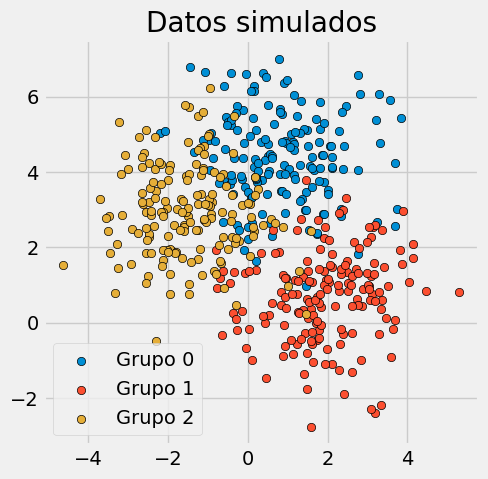

In [ ]:
# Datos simulados
# ==============================================================================
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();

##Arquitectura de la red
Se procede a crear 4 modelos en orden creciente de complejidad (número de neuronas y capas), para comprobar cómo la arquitectura de la red afecta a su capacidad de aprendizaje.

In [ ]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

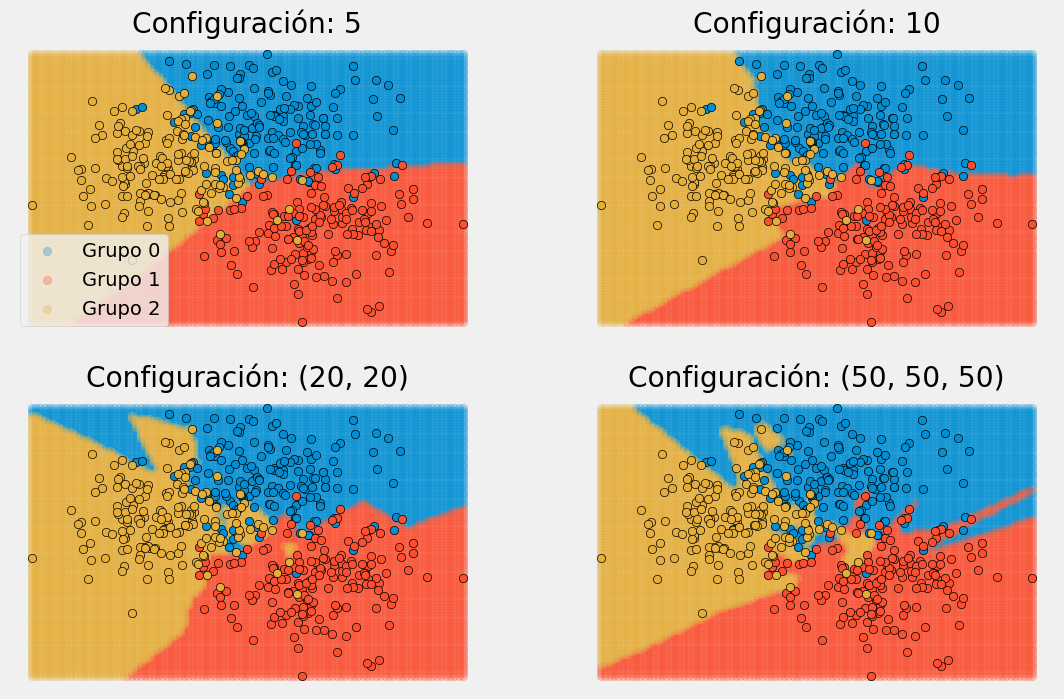

In [ ]:
# Gráfico de predicciones
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )

    axs[i].set_title(f"Configuración: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

Puede observarse como, a medida que aumenta la complejidad de la red (más neuronas y más capas), las fronteras de decisión se adaptan más y más a los datos de entrenamiento.


##Optimización de hiperparámetros

En este apartado, se muestra cómo afectan al aprendizaje algunos de los hiperparámetros más influyentes. Como los 2 predictores tienen la misma escala, no es estrictamente necesarios aplicarles una normalización previo entrenamiento.

In [ ]:
# Aquí variamos el número de neuronas
# ==============================================================================
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(solver = 'lbfgs',random_state = 42),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        return_train_score = True
      )

grid.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42, solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [1, 5, 10, 15, 25, 50]},
             return_train_score=True, scoring='accuracy')

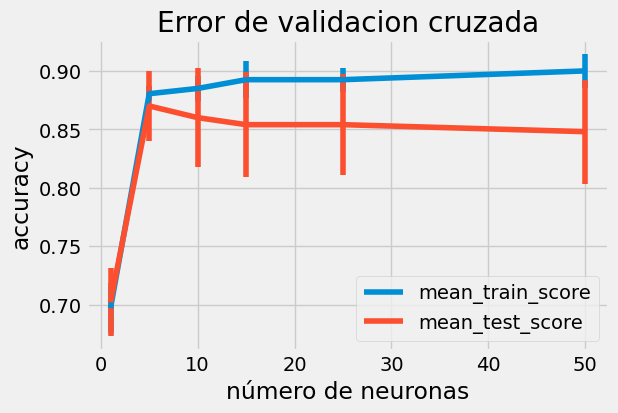

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.01539221, 0.05701175, 0.07479062, 0.08423123, 0.09071722,
        0.11262107]),
 'std_fit_time': array([0.00179433, 0.02105073, 0.00924619, 0.00277373, 0.00185611,
        0.00149729]),
 'mean_score_time': array([0.00101233, 0.00082307, 0.00089097, 0.00086951, 0.0008162 ,
        0.0007812 ]),
 'std_score_time': array([1.34675731e-04, 7.78661209e-05, 8.40528800e-05, 1.00100943e-04,
        6.30265455e-05, 1.38320589e-05]),
 'param_hidden_layer_sizes': masked_array(data=[1, 5, 10, 15, 25, 50],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'hidden_layer_sizes': 1},
  {'hidden_layer_sizes': 5},
  {'hidden_layer_sizes': 10},
  {'hidden_layer_sizes': 15},
  {'hidden_layer_sizes': 25},
  {'hidden_layer_sizes': 50}],
 'split0_test_score': array([0.74, 0.87, 0.88, 0.84, 0.88, 0.88]),
 'split1_test_score': array([0.71, 0.88, 0.85, 0.85, 0.85, 0.81]),
 'split2_test_score': array([0.71, 0.92, 0.92, 0.93, 0.91, 0.

In [ ]:
# aquí variamos el learning rate
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(10),
                        solver = 'lbfgs',
                        random_state = 42
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        return_train_score = True
      )

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=10, random_state=42,
                                     solver='lbfgs'),
             param_grid={'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                                100]},
             return_train_score=True, scoring='accuracy')

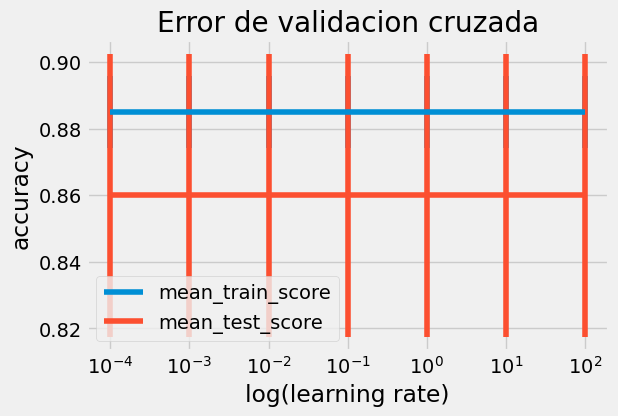

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');

Si bien los dos ejemplos anteriores sirven para tener una idea intuitiva de cómo afecta cada hiperparámetro, no es posible optimizarlos de forma individual, ya que el impacto final que tiene cada uno depende de qué valor tomen los demás. La búsqueda de hiperparámetros debe hacerse en conjunto.


Dado el elevado número de hiperparámetros que tiene los modelos de redes neuronales, la combinación de posibles configuraciones es muy elevada. Esto hace que la búsqueda de hiperparámetros por grid search cartesiano (todas las combinaciones) sea poco práctica. En su lugar, suele emplearse random grid search, que hace una búsqueda de combinaciones aleatorias. Para más información sobre esta y otras estrategias de búsqueda consultar Hiperparámetros (tuning)).

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(5), (10), (10, 10), (20, 20), (30, 5)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'solver' : ['lbfgs', 'adams']
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X, y)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_solver,param_learning_rate_init,param_hidden_layer_sizes,mean_test_score,std_test_score,mean_train_score,std_train_score
4,lbfgs,0.100,5,0.865907,0.045794,0.878984,0.016791
2,lbfgs,0.010,5,0.863911,0.039921,0.876976,0.021063
6,lbfgs,0.001,10,0.863899,0.044784,0.884978,0.018514
8,lbfgs,0.010,10,0.861879,0.047150,0.886965,0.029550
16,lbfgs,0.100,"(10, 10)",0.857887,0.049669,0.898977,0.026514
0,lbfgs,0.001,5,0.855915,0.034682,0.887981,0.020938
20,lbfgs,0.010,"(20, 20)",0.853967,0.040840,0.907989,0.013571
10,lbfgs,0.100,10,0.853907,0.045819,0.890972,0.024774
14,lbfgs,0.010,"(10, 10)",0.851923,0.038351,0.892983,0.016420
12,lbfgs,0.001,"(10, 10)",0.849903,0.055875,0.898980,0.026280


La combinación de hiperparámetros que mejores resultados consigue es:

In [ ]:
modelo = grid.best_estimator_
modelo

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.1, solver='lbfgs')

Una vez entrenado el modelo, al tratarse de solo dos predictores, puede mostrarse gráficamente las regiones de clasificación aprendidas.

In [ ]:
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
predicciones = modelo.predict(X_grid)

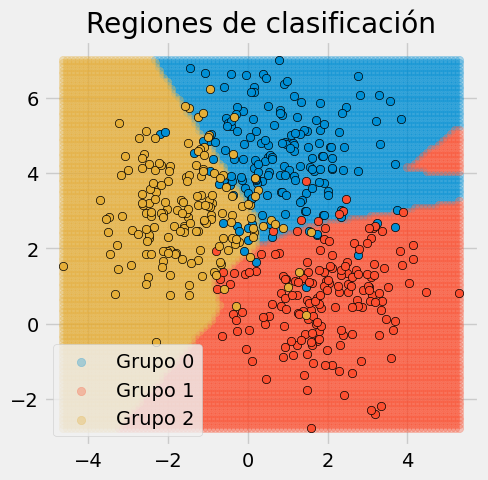

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black'
    )


ax.set_title('Regiones de clasificación')
ax.legend();

#Caso de uso: predicción de precios vivienda


El set de datos SaratogaHouses del paquete mosaicData de R contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

- price: precio de la vivienda.
- lotSize: metros cuadrados de la vivienda.
- age: antigüedad de la vivienda.
- landValue: valor del terreno.
- livingArea: metros cuadrados habitables.
- pctCollege: porcentaje del vecindario con título universitario.
- bedrooms: número de dormitorios.
- firplaces: número de chimeneas.
- bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a - cuartos de baño sin ducha).
- rooms: número de habitaciones.
- heating: tipo de calefacción.
- fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
- sewer: tipo de desagüe.
- waterfront: si la vivienda tiene vistas al lago.
- newConstruction: si la vivienda es de nueva construcción.
- centralAir: si la vivienda tiene aire acondicionado.

El objetivo es obtener un modelo capaz de predecir el precio del alquiler.

##Librerías

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

##Datos

In [ ]:
# Descarga de datos
# ==============================================================================
url = ("https://github.com/gustavovazquez/datasets/raw/main/SaratogaHouses.csv")

datos = pd.read_csv(url, sep=",")




# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios",
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

#import sweetviz
#Generating report
#report = sweetviz.analyze(datos)
#report.show_notebook()

#!pip install pandas-profiling
#Importing ProfileReport
#from pandas_profiling import ProfileReport
#Generating Report
#report = ProfileReport(datos)


#Análisis exploratorio


Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

- Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

- Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

- Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo.


In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

Todas las columnas tienen el tipo de dato correcto.

In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

,0
precio,0
metros_totales,0
antiguedad,0
precio_terreno,0
metros_habitables,0
universitarios,0
dormitorios,0
chimenea,0
banyos,0
habitaciones,0


Todas las columnas están completas, no hay valores ausentes.

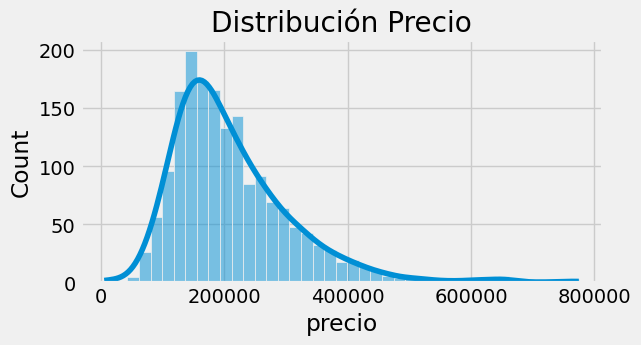

In [ ]:
# Distribución variable respuesta
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

Los modelos de redes neuronales son de tipo no paramétrico, no asumen ningún tipo de distribución de la variable respuesta, por lo tanto, no es necesario que esta siga ninguna distribución concreta (normal, gamma...). Aun así, siempre es recomendable hacer un estudio mínimo, ya que, a fin de cuentas, es lo que interesa predecir. En este caso, la variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.

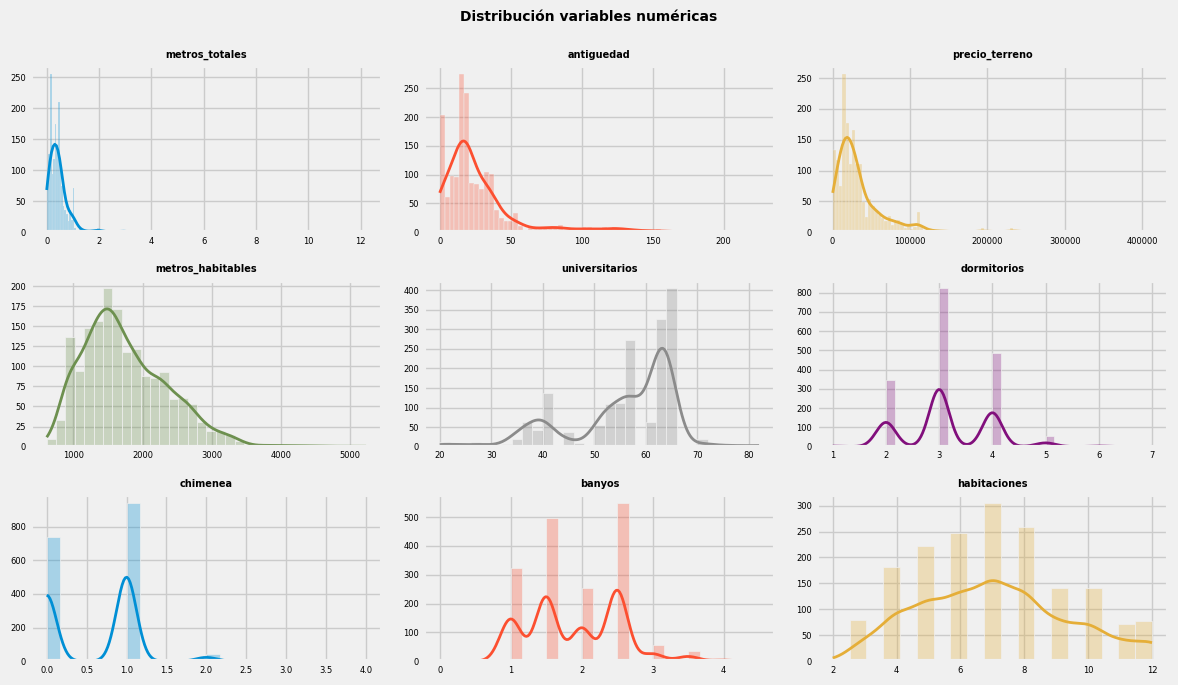

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [ ]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

,count
chimenea,
1,942
0,740
2,42
4,2
3,2


In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


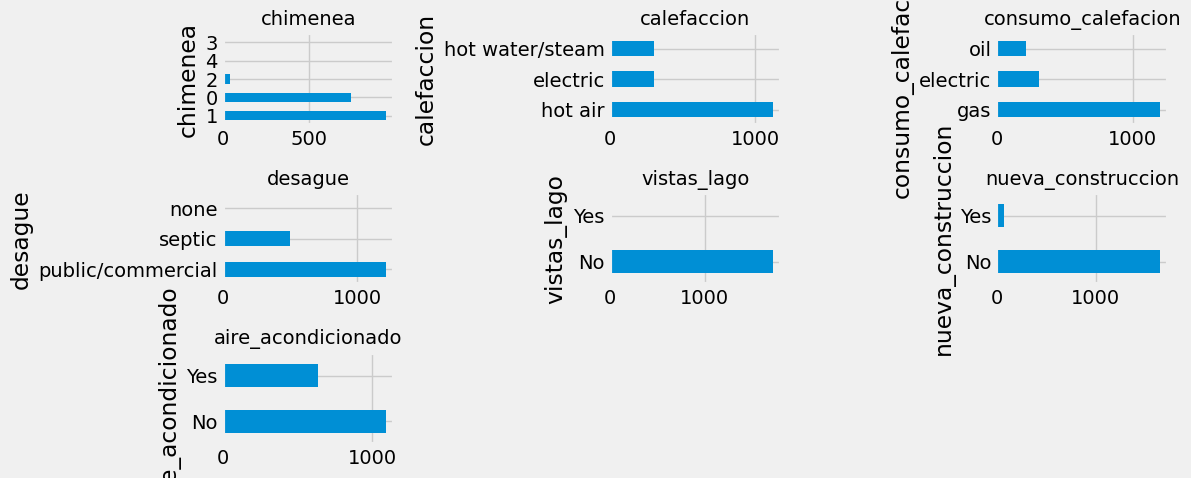

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. Para este caso, hay que tener precaución con la variable chimenea. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [ ]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])
datos.chimenea.value_counts().sort_index()

,count
chimenea,
0,740
1,942
2_mas,46


##División train y test


Con el objetivo de poder estimar el error que comete el modelo al predecir nuevas observaciones, se dividen los datos en dos grupos, uno de entrenamiento y otro de test (80%, 20%).

In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Tras realizar el reparto, se verifica que los dos grupos son similares.

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


,precio
count,1382.000000
mean,211436.516643
std,96846.639129
min,10300.000000
25%,145625.000000
50%,190000.000000
75%,255000.000000
max,775000.000000


,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.501331,27.494211,34232.141823,1755.940666,55.439942,3.165702,1.902677,7.073082
std,0.671766,28.212721,35022.662319,621.262215,10.356656,0.825487,0.660053,2.315395
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,0.170000,13.000000,15100.000000,1302.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1650.000000,57.000000,3.000000,2.000000,7.000000
75%,0.540000,33.750000,39200.000000,2127.250000,63.000000,4.000000,2.500000,9.000000
max,8.970000,201.000000,412600.000000,4856.000000,82.000000,7.000000,4.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1382,1382,1382,1382,1382,1382,1382
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,741,915,972,970,1370,1321,863


 
Partición de test
-----------------------


,precio
count,346.000000
mean,214084.395954
std,104689.155889
min,5000.000000
25%,139000.000000
50%,180750.000000
75%,271750.000000
max,670000.000000


,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.495751,29.601156,35855.491329,1751.121387,56.078035,3.109827,1.890173,6.916185
std,0.798240,32.884116,35035.761216,615.486848,10.239861,0.783575,0.652368,2.319776
min,0.010000,0.000000,300.000000,792.000000,20.000000,1.000000,1.000000,2.000000
25%,0.160000,13.000000,15100.000000,1296.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,26700.000000,1608.000000,57.000000,3.000000,2.000000,7.000000
75%,0.557500,34.000000,45950.000000,2181.000000,64.000000,4.000000,2.500000,8.000000
max,12.200000,225.000000,233000.000000,5228.000000,82.000000,6.000000,4.000000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,346,346,346,346,346,346,346
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,201,206,225,243,343,326,230


##Preprocesamiento


Los modelos de redes neuronales requieren como mínimo de dos tipos de preprocesamiento: binarización (One hot ecoding) de las variables categóricas y estandarización de las variables continuas.

In [ ]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [ ]:
set_config(display='text')

In [ ]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

Si bien realizar el preprocesado de forma separada del entrenamiento es útil para explorar y confirmar que las transformaciones realizadas son las deseadas, en la práctica, es más adecuado asociarlo al propio proceso de entrenamiento. Esto puede hacerse fácilmente en los modelos de scikit-learn con los `Pipeline`.

##Modelado
###Pipepeline de preprocesado + modelado

In [ ]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5,
        verbose    = 0,
        random_state = 42,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
33,0.010,10,1000.000000,-3.276289e+09,7.087096e+08,-2.656717e+09,2.518604e+08
8,0.001,10,0.021544,-3.304123e+09,8.012885e+08,-2.511924e+09,3.920079e+08
17,0.001,10,0.004642,-3.340877e+09,7.612701e+08,-2.542475e+09,1.987503e+08
48,0.010,10,215.443469,-3.383750e+09,6.354125e+08,-2.687985e+09,2.901417e+08
7,0.001,10,215.443469,-3.412080e+09,6.876917e+08,-2.586221e+09,2.555145e+08
29,0.001,10,2.154435,-3.422781e+09,6.999798e+08,-2.687804e+09,2.387406e+08
23,0.001,"(10, 10)",1000.000000,-3.447188e+09,6.072004e+08,-2.471224e+09,1.465683e+08
5,0.001,10,1000.000000,-3.509298e+09,6.559104e+08,-2.529228e+09,2.758356e+08
41,0.010,10,0.001000,-3.525221e+09,6.439520e+08,-2.483419e+09,1.364266e+08
46,0.010,"(10, 10)",2.154435,-3.536950e+09,1.017684e+09,-2.378801e+09,2.187545e+08


##Error de test

Aunque mediante los métodos de validación (Kfold, LeaveOneOut) se consiguen buenas estimaciones del error que tiene un modelo al predecir nuevas observaciones, la mejor forma de evaluar un modelo final es prediciendo un conjunto test, es decir, un conjunto de observaciones que se ha mantenido al margen del proceso de entrenamiento y optimización.

In [ ]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = root_mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  66965.17812150414


##Conclusión

La combinación de hiperparámetros con la que se obtienen mejores resultados acorde a las metricas de validación cruzada es:

In [ ]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': np.float64(1000.0),
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

El error del modelo (rmse) al aplicarlo al conjunto de test es de 65359.

#Bibliografía


The Elements of Statistical Learning (2nd edition)

Hastie, Tibshirani and Friedman (2009). Springer-Verlag.

Applied Predictive Modeling by Max Kuhn and Kjell Johnson

Deep Learning by Josh Patterson, Adam Gibson

Python Machine Learning 3rd Edition by Sebastian Raschka

Hands-On Computer Vision with TensorFlow 2 by Benjamin Planche and Eliot Andres

In [ ]:
!pip install sweetviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 101.7 MB/s eta 0:00:00
